# Exploratory data analysis

Import necessary modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap

import json
from glob import glob
import time
import numpy as np
from matplotlib import rcParams 


First, read in all available MRIs as well as the corresponding annotations for each file.

In [22]:
#Windows
wpth ='C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples'
wpth.replace("\\","/")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3875718090.py, line 2)

In [11]:
# Read in data files

# CHANGE data_dir path as per your local set up
pthAlex = '/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/data/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/'
pthAly = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples\\'

data_dir = pthAly
print(data_dir)
folders = os.listdir(data_dir)
print("Total folders: ", len(folders), "\n Subjects: ",  folders)

C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\
Total folders:  4 
 Subjects:  ['BraTS-GLI-00002-000', 'BraTS-GLI-01035-000', 'BraTS-SSA-00002-000', 'BraTS-SSA-00046-000']


Now, lets visualise an example image from this dataset. 

all BraTS mpMRI scans are available as NIfTI files (.nii.gz) and describe 4 modalities:
a) native (T1) 
b) post-contrast T1-weighted (T1Gd), 
c) T2-weighted (T2), 
d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) 

Each modality has dimensions (240, 240, 155).

The segementation volume contains values [0, 1, 2, 3]. As per BraTS summarizing paper for 2023, annotations comprise the 
- 1 for NCR (necrotic tumor core)
- 2 for ED (peritumoral edematous/invaded tissue)
- 3 for ET (GD-enhancing tumor)
- 0 for everything else



In [12]:
### NOT NECESSARY TO RUN###
# Windows path check
img_folder = folders[random.randrange(0, len(folders))]
print(f"Working with subject: {img_folder}")
print(os.path.join(data_dir + img_folder))

Working with subject: BraTS-SSA-00002-000
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-SSA-00002-000


In [14]:
#Select one subject to Explore

#randomly select a subject
img_folder = folders[random.randrange(0, len(folders))]
print(f"Working with subject: {img_folder}")

## Set up files
# Load image volumes
img_volumes = [nib.load(os.path.join(data_dir + img_folder, img_folder + f"-{m}.nii.gz")) for m in ["t1c", "t1n", "t2f", "t2w"]]

# Load segmentation volume
seg_volume = nib.load(os.path.join(data_dir + img_folder, img_folder + "-seg.nii.gz"))



Working with subject: BraTS-SSA-00002-000


In [18]:
def load_modalities(modalities, data_dir):
    # Create paths for each modality 
    img_modalitypth = [(os.path.join(data_dir + img_folder, img_folder + f"-{m}.nii.gz")) for m in modalities]
    ## double check for files loaded
    for i in range(len(img_modalitypth)) : print(os.path.basename(img_modalitypth[i]))  #double check files loaded
    
    # load modalities into a list, generate headers
    img_modality = []
    hdrs = {}
    for idx, mname in enumerate(modalities):
        globals()[f'{mname}_img'] = nib.load(img_modalitypth[idx])
        img_modality.append(globals()[f'{mname}_img'])
        hdrs[f'{mname}_img'] = img_modality[idx].header
        print(f"Dimensions for modality {mname} is {img_modality[idx].shape}, with isotropic resolution of {hdrs[f'{mname}_img'].get_zooms()} ")
    return img_modality, hdrs

# Create ref names for each modality 
modal = ["t1c", "t1n", "t2f", "t2w"]
img_modality, hdrs = load_modalities(modal, data_dir)


BraTS-SSA-00002-000-t1c.nii.gz
BraTS-SSA-00002-000-t1n.nii.gz
BraTS-SSA-00002-000-t2f.nii.gz
BraTS-SSA-00002-000-t2w.nii.gz
Dimensions for modality t1c is (240, 240, 155), with isotropic resolution of (1.0, 1.0, 1.0) 
Dimensions for modality t1n is (240, 240, 155), with isotropic resolution of (1.0, 1.0, 1.0) 
Dimensions for modality t2f is (240, 240, 155), with isotropic resolution of (1.0, 1.0, 1.0) 
Dimensions for modality t2w is (240, 240, 155), with isotropic resolution of (1.0, 1.0, 1.0) 


# Visualise Modalities

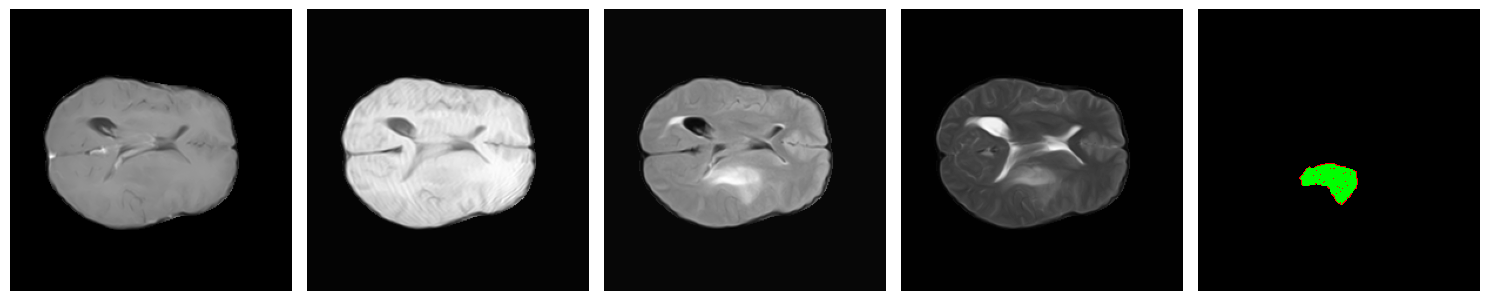

In [19]:
# Extract slice for visualisation purposes
# Extract 75th slice
imgs = [img_volumes[i].get_fdata().astype(np.float32)[:, :, 75] for i in range(len(img_volumes))]
lbl = seg_volume.get_fdata().astype(np.float32)[:, :, 75]

# Create colour map to plot
colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
ax[-1].imshow(lbl, vmin=0, vmax=4, cmap=cmap)
ax[-1].axis('off')
plt.tight_layout()            
plt.show()

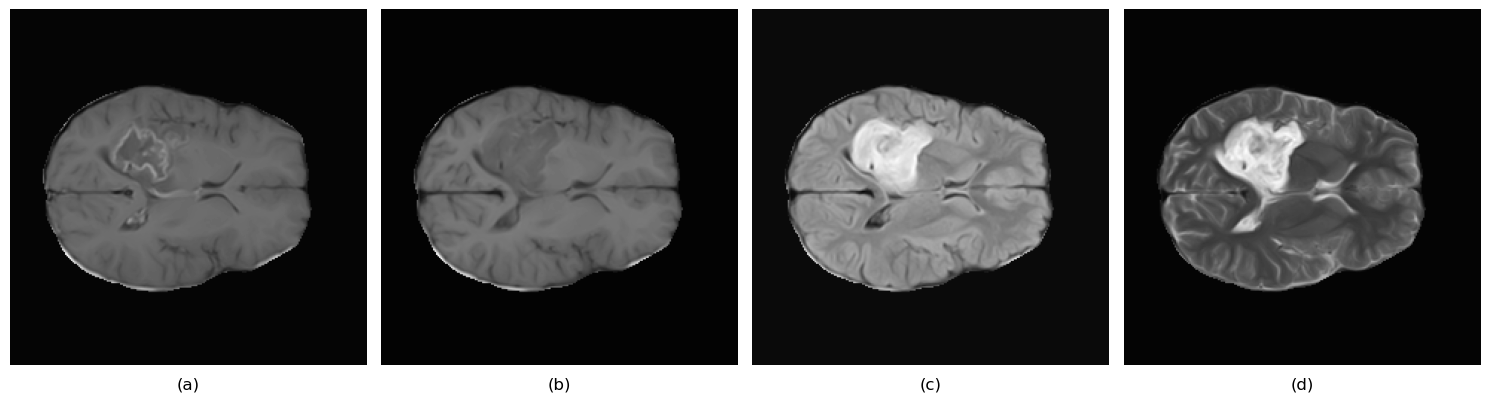

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
labels = ["(a)", "(b)", "(c)", "(d)"]
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(labels[i], y=-0.09)

    # ax[i].set_title(labels[i])
plt.tight_layout()    
plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '.png', bbox_inches='tight')     
plt.show()   

# for i, img in enumerate(imgs):
#     plt.imshow(img, cmap="gray")
#     plt.axis('off')
#     plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_' + labels[i]  + '.png')


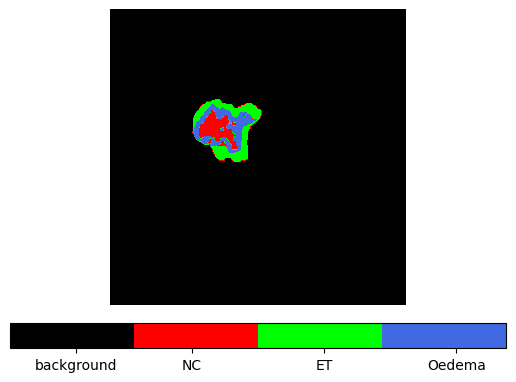

In [61]:
# Save segmentation mask
cax = plt.imshow(lbl, cmap=cmap)
plt.axis('off')
# plt.colorbar()
cbar = fig.colorbar(cax, ticks=[0.4, 1.1, 1.9, 2.7], orientation='horizontal', pad=0.05)
# plt.colorbar(ticks=['background', 'NC', 'ET', 'Oedema'])
cbar.ax.set_xticklabels(['background', 'NC', 'ET', 'Oedema'])
plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_seg'  + '.png')

### Trying to create a visual

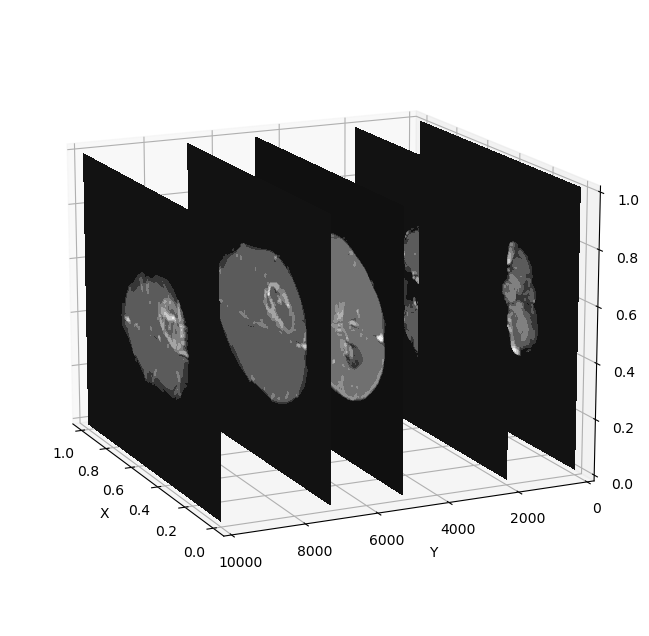

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create a vertex mesh
X, Z = np.meshgrid(np.linspace(0,1,240), np.linspace(0,1,240))

# create the figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection ='3d')

data = imgs[0]
mod = img_volumes[0]

ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 20], Z, zdir='y', offset=-0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 50], Z, zdir='y', offset=2000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 75], Z, zdir='y', offset=5000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 110], Z, zdir='y', offset=7000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 130], Z, zdir='y', offset=10000.0, cmap='gray')

ax.view_init(15,155)
ax.set_ylim((0., 10000))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# for axis in [ax1.xaxis, ax1.yaxis, ax1.zaxis]:
# # for axis in [ax1.yaxis]:
#     axis.set_ticklabels([])
#     axis._axinfo['axisline']['linewidth'] = 1
#     axis._axinfo['axisline']['color'] = (0, 0, 0)
#     axis._axinfo['grid']['linewidth'] = 0.5
#     axis._axinfo['grid']['linestyle'] = "-"
#     axis._axinfo['grid']['color'] = (0, 0, 0)
#     axis._axinfo['tick']['inward_factor'] = 0.0
#     axis._axinfo['tick']['outward_factor'] = 0.0
#     axis.set_pane_color((0.95, 0.95, 0.95))
plt.show()

## Voxel intensities per modality

(array([[240.,   0.,   0., ...,   0.,   0.,   0.],
        [240.,   0.,   0., ...,   0.,   0.,   0.],
        [240.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [240.,   0.,   0., ...,   0.,   0.,   0.],
        [240.,   0.,   0., ...,   0.,   0.,   0.],
        [240.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([   0.        ,  594.59997559, 1189.19995117, 1783.80004883,
        2378.39990234, 2973.        , 3567.60009766, 4162.20019531,
        4756.79980469, 5351.39990234, 5946.        ]),
 <a list of 155 BarContainer objects>)

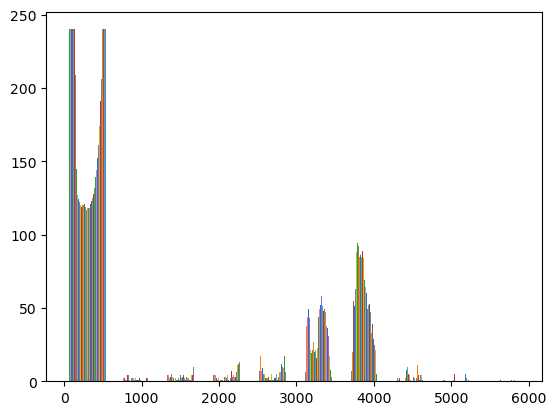

In [73]:
img = img_modality[0].get_fdata().astype(np.float32)[:, 120, :]
plt.hist(img)

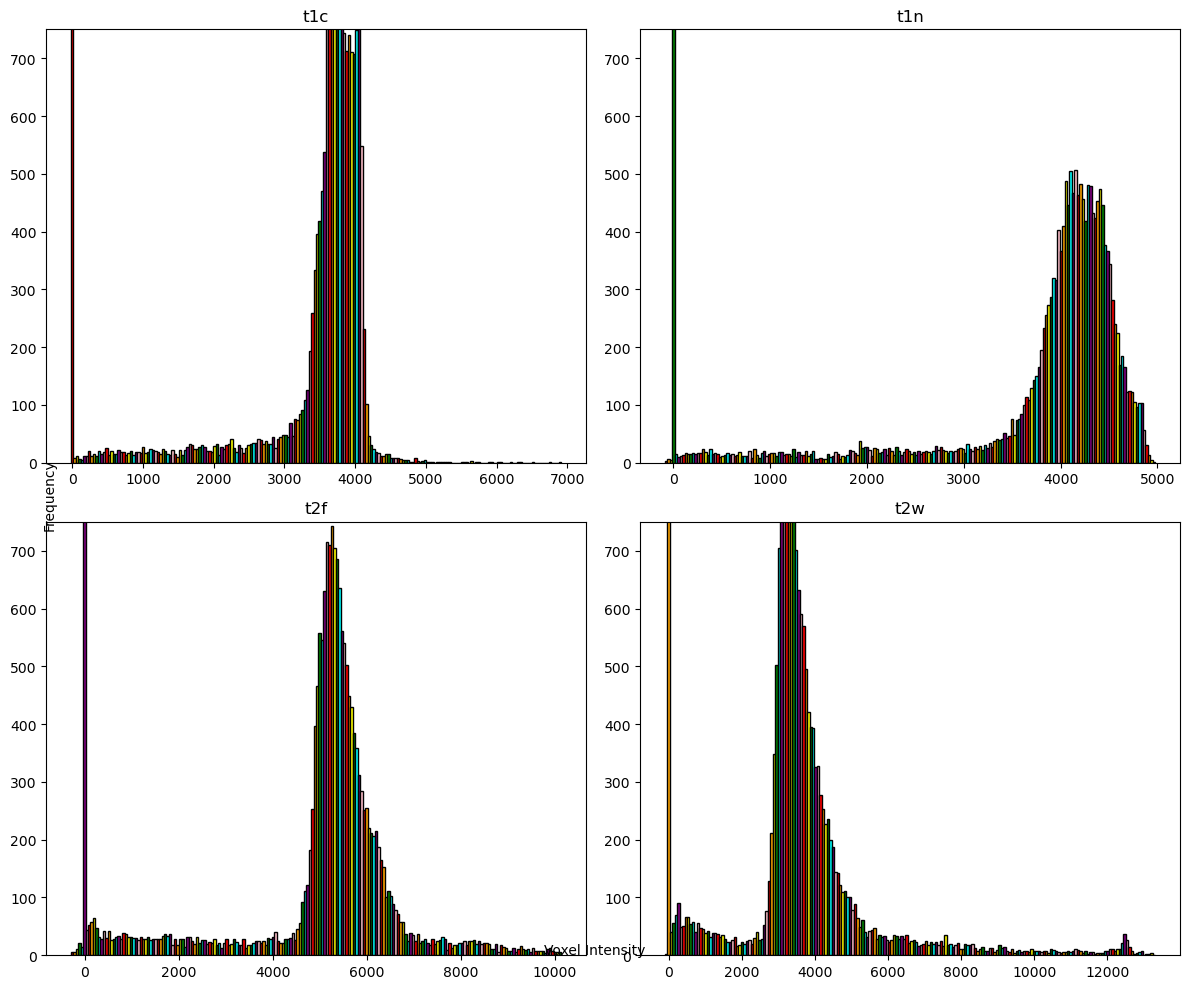

In [77]:
import matplotlib.colors as mcolors

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define a colormap
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'purple', 'pink']
# Iterate over img_modality and modal lists simultaneously
for img, label in zip(img_modality, modal):
    # Get the image data for the current modality
    data = img.get_fdata().astype(np.float32)[:, :, 75]

    # Select the subplot based on the current index
    ax = axes[modal.index(label) // 2, modal.index(label) % 2]

    # Plot the histogram for the current modality
    cnts, values, bars = ax.hist(data.ravel(), bins=200, edgecolor='k')
    for i, bar in enumerate(bars):
        bar.set_facecolor(colors[i % len(colors)])
    ax.set_title(label)
    ax.set_ylim(0, 750)

# Set common labels for the x-axis and y-axis
fig.text(0.5, 0.04, 'Voxel Intensity', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

AA To Do List for data exploration:
Check header information for SSA data
Check interslice distributions

